import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from quantum_dynamics import Dynamics
import numpy as np
from ions import Chain
from ion_trap import IonTrap
import matplotlib.pylab as plt  
from laser import *

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from quantum_dynamics import Dynamics
import numpy as np
from ions import Chain
from ion_trap import IonTrap
import matplotlib.pylab as plt  
from laser import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
omegax = 2.0e6
omegaz = 150.e3
N = 5
chain = Chain(N, 2)
dummy_trap = IonTrap( omegax , omegaz)
dummy_trap.load(chain)
zpositions =   np.array( chain.get_positions() )
#harmonic potential couplings:
couplings_harmonic = chain.get_couplings()

In [3]:
motional_state = (1,0,0,0,0)
electronic_state = (0,0,0,0,0)
laser = Laser( ion_num = 5, sideband_num = 1, intensity = 0, phase = 2*np.pi* 0, detuning=0)
#chain.set_thermal_motional_state( motional_state )
chain.set_pure_motional_state( motional_state )
chain.set_pure_electronic_state_numbers( electronic_state )


dyn_wout_laser = Dynamics(chain, lasers = [laser], pulses = [])
observables = [ dyn_wout_laser.a[0].dag() * dyn_wout_laser.a[0], dyn_wout_laser.a[0].dag() * dyn_wout_laser.a[0] ]
time_interval = (0., 2000.e-6)
time_precision = 2.e-6
times = np.arange(time_interval[0], time_interval[1], time_precision)
dyn_wout_laser.evolve_pure(time_interval, observables)

laser.intensity, laser.detuning = 2*np.pi* 200.e3, 2*np.pi* 100.e3 
#chain.set_thermal_motional_state( motional_state )

dyn_w_laser = Dynamics(chain, lasers = [laser], pulses = [])
dyn_w_laser.evolve_pure(time_interval, observables)



Exception: Frame must be specified.

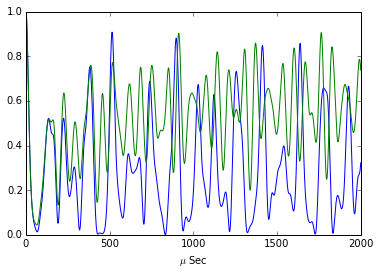

In [12]:
plt.plot(times*1.e6, dyn_wout_laser.expectations[0], times*1.e6, dyn_w_laser.expectations[0])
plt.xlabel("$\mu$ Sec")
plt.savefig('../Data_Storage/{}ions-InitState{}_{}KHzAxial_Rabifreq{}_Detuning{}.jpg'.format(N, motional_state,omegaz/1.e3, laser.intensity/(2*np.pi*1.e3), laser.detuning/(2*np.pi*1.e3), bbox_inches='tight'))
plt.show()

In [2]:
#A Ramsey pulse sequence using exponential:

lasers = []
time_precision = 1.e-8
dyn = Dynamics(chain, lasers, time_precision )

motional_state = (1, 0, 0, 0, 0)
electronic_state  = (0, 0, 0, 0, 1)
chain.set_pure_motional_state( motional_state )
chain.set_pure_electronic_state_numbers( electronic_state )
pulse1 = Pulse( ion_num = 0, sideband_num = 1, intensity = 2*np.pi* 100e3, phase = 2*np.pi* 0 , duration = 8.e-6 )
pulse2 = Pulse( ion_num = 4, sideband_num = 1, intensity = 2*np.pi* 100e3, phase = 2*np.pi* 0 , duration = 8.e-6 )

chain.initialize_chain_electronic_states(lasers = [], pulses = [pulse1, pulse2])

NameError: name 'chain' is not defined

In [13]:
dyn.exponential * dyn.exponential.dag()

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = [32, 32], type = oper, isherm = True
Qobj data =
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.01573061e+00   5.00568191e-05 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   5.00568191e-05   1.01565988e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.25102675e+00
    2.00106793e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.00106793e-04
    1.25074356e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.39208204e+00]]

In [7]:
from scipy.misc import factorial
float(factorial(2))

2.0

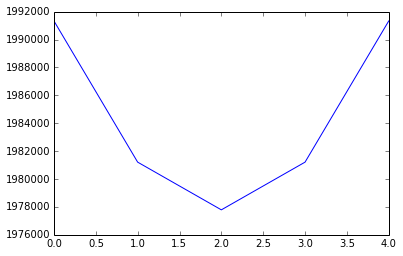

In [11]:
radials = [chain.couplings[i][i]/(2*np.pi) for i in range(N)]
plt.plot(range(N), radials)

In [56]:
#Checking validity of electronic state populations:
omegax = 2.0e6
omegaz = 150.e3
N = 1
chain = Chain(N, 3)
dummy_trap = IonTrap( omegax , omegaz)
dummy_trap.load(chain)

#motional_state   = (1,0,0,0,0)
#electronic_state = (0,0,0,0,0)
motional_state   = (0,)
electronic_state = (,)
continuous_laser_on_ion = 1
sideband_number  =  -1



time_interval = (0., 2000.e-6)
time_precision = 2.e-6
times = np.arange(time_interval[0], time_interval[1], time_precision)
laser = Laser( ion_num = continuous_laser_on_ion, sideband_num = sideband_number, intensity = 0, phase = 2*np.pi* 0, detuning=0)
#chain.set_thermal_motional_state( motional_state )
chain.set_pure_motional_state( motional_state )
chain.set_pure_electronic_state_numbers( electronic_state )


dyn_w_laser = Dynamics(chain, lasers = [laser], pulses = [])
observables_w = [ dyn_w_laser.a[0].dag() * dyn_w_laser.a[0], dyn_w_laser.excited_state_pop[continuous_laser_on_ion-1]]

laser.intensity, laser.detuning = 2*np.pi* 100.e3, 2*np.pi* 100.e3 
dyn_wout_laser = Dynamics(chain, lasers = [laser], pulses = [])
observables_wout = [ dyn_wout_laser.a[0].dag() * dyn_wout_laser.a[0], dyn_wout_laser.excited_state_pop[continuous_laser_on_ion-1]]

dyn_wout_laser.evolve_pure(time_interval, observables_wout)

#chain.set_thermal_motional_state( motional_state )
dyn_w_laser.evolve_pure(time_interval, observables_w)

Simulation running in RWA regime
Simulation running in RWA regime


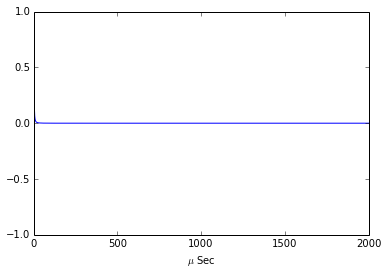

In [60]:
plt.plot(times*1.e6, dyn_wout_laser.expectations[1])#, times*1.e6, dyn_w_laser.expectations[1])
#plt.plot(times*1.e6, dyn_w_laser.expectations[1])
plt.xlabel("$\mu$ Sec")
plt.ylim(-1,1)
#plt.xlim(0,100)
plt.show()

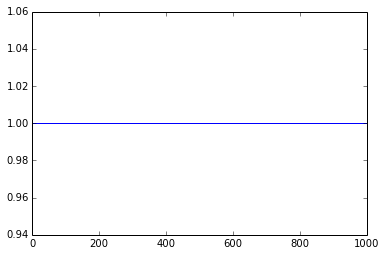

In [63]:
plt.plot(dyn_w_laser.expectations[1])
plt.show()

In [ ]:
dyn = Dynamics( 